# This notebook contains the Stacks parameter tests, final scripts used and analyses to identify sex linked markers for the ddRADseq dataset of <i>Lithobates montezumae</i> 
## Sample set:

12 females
5 males

Not ideal. 


###No idea what the locations are. 
    
Samples will be run through Stacks together, then I will do a PCA to check for any structure. 


##Contents of this notebook:

####1. Ustacks parameter tests using a subset of samples
####2. Cstacks parameter tests using a subset of samples
####3. Populations parameter tests (for separate families, using all samples in each family)
####4. Identification of sex-linked markers
####5. Map sex-linked markers to the genome(s). 


In [2]:
%matplotlib inline
import os
import Incremental_U as IncU 
import Incremental_C as IncC
import Incremental_Pop_mod as IncPop
import MISC_RAD_tools as MISC
import pprint
import subprocess

In [6]:
%load_ext rpy2.ipython

##1. Ustacks parameter tests

In [9]:
### Fastq files are here:
Incrememntal_test_directory = "/home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Ustacks/"

In [11]:
## INPUT INCREMENTAL TEST PARAMETERS HERE -----------------------------------------

parameters = ["M", "m", "MS"]                   ## List, eg ["M", "m", "MS"]. If only testing 1 param, this must still be a list e.g. ["M"]
M_vals =   [2,3,4,5,6]                          ## List, eg range(1,5,1) this would give [1,2,3,4]
m_vals =   [2,3,4,5,6]                          ## List, eg range(1,5,1) this would give [1,2,3,4]
MS_vals =  [2,3,4]                              ## List, eg range(1,5,1) this would give [1,2,3,4]
threads =  7                                    ## Int. eg 7
parent_dir = Incrememntal_test_directory        ## Absolute Dir containing the demultiplexed raw read fasta/fastq files
run_cline_switch =  1                           ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

print "Analsyses will be performed in %s" % parent_dir

## Making input dictionary --------------------------------------

Setup_dict = {}
Setup_dict["parameters"] = {}
Setup_dict["threads"] = threads
Setup_dict["parent_directory"] = parent_dir
Setup_dict["run_cline_switch"] = run_cline_switch
Setup_dict["verbose"] = False

for param in parameters:
    if "M" in param:
        Setup_dict["parameters"][param] = M_vals
    if "m" in param:
        Setup_dict["parameters"][param] = m_vals
    if "MS" in param:
        Setup_dict["parameters"][param] = MS_vals

#pp = pprint.PrettyPrinter(indent=2)
#pp.pprint(Setup_dict)


Analsyses will be performed in /home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Ustacks/



##### ------- Test samples, parameters and values ------ #####

{ 'LmonF1.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                    'MS': { 2: { }, 3: { }, 4: { }},
                    'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'LmonF10.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                     'MS': { 2: { }, 3: { }, 4: { }},
                     'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'LmonF11.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                     'MS': { 2: { }, 3: { }, 4: { }},
                     'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'LmonF12.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                     'MS': { 2: { }, 3: { }, 4: { }},
                     'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'parent_directory': '/home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Ustacks/'}

               ##### PLOTTING #####                 



/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


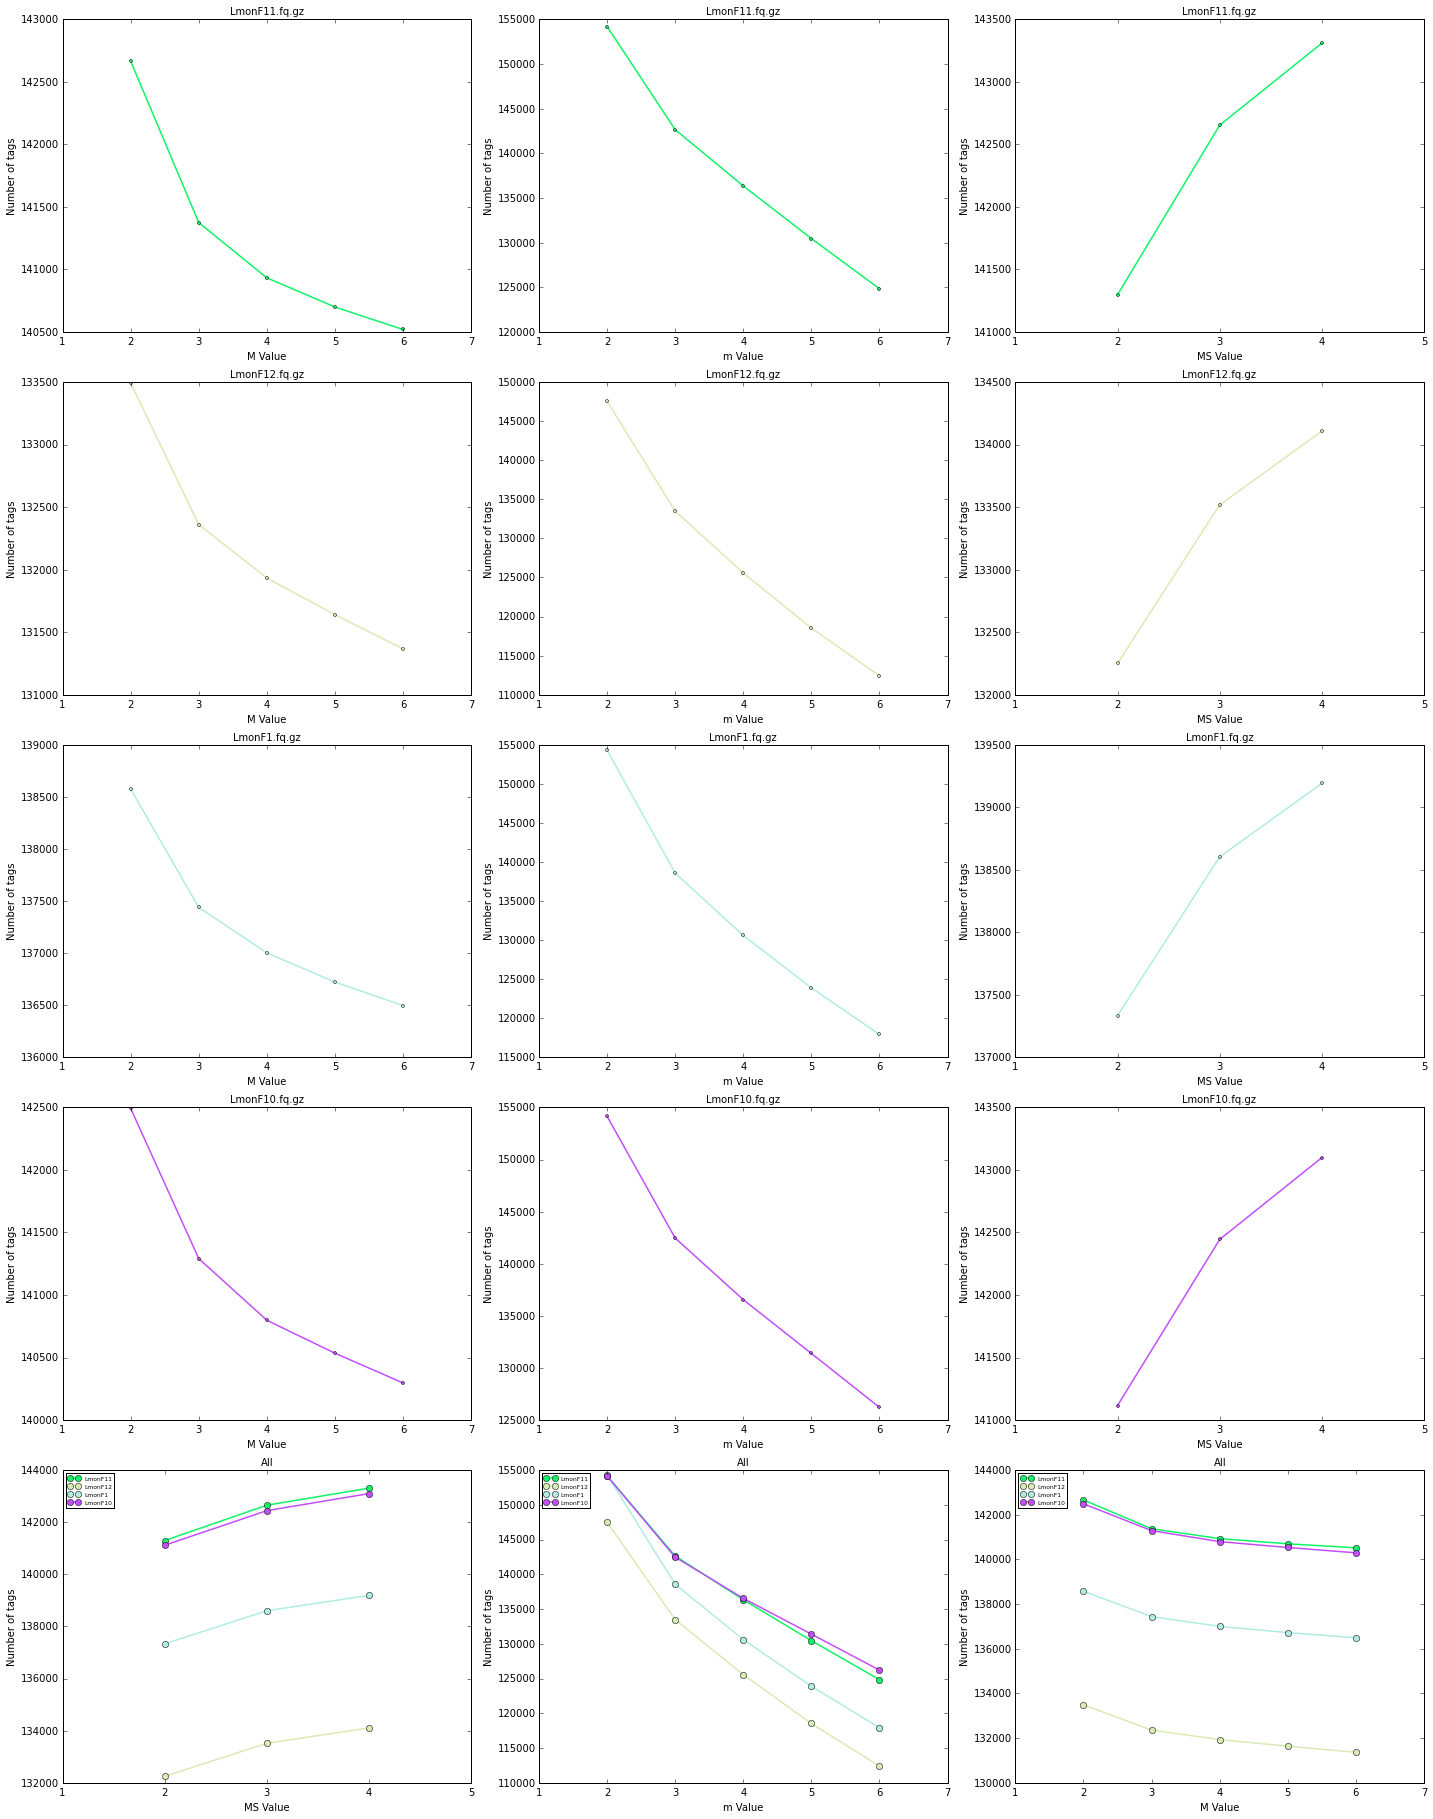

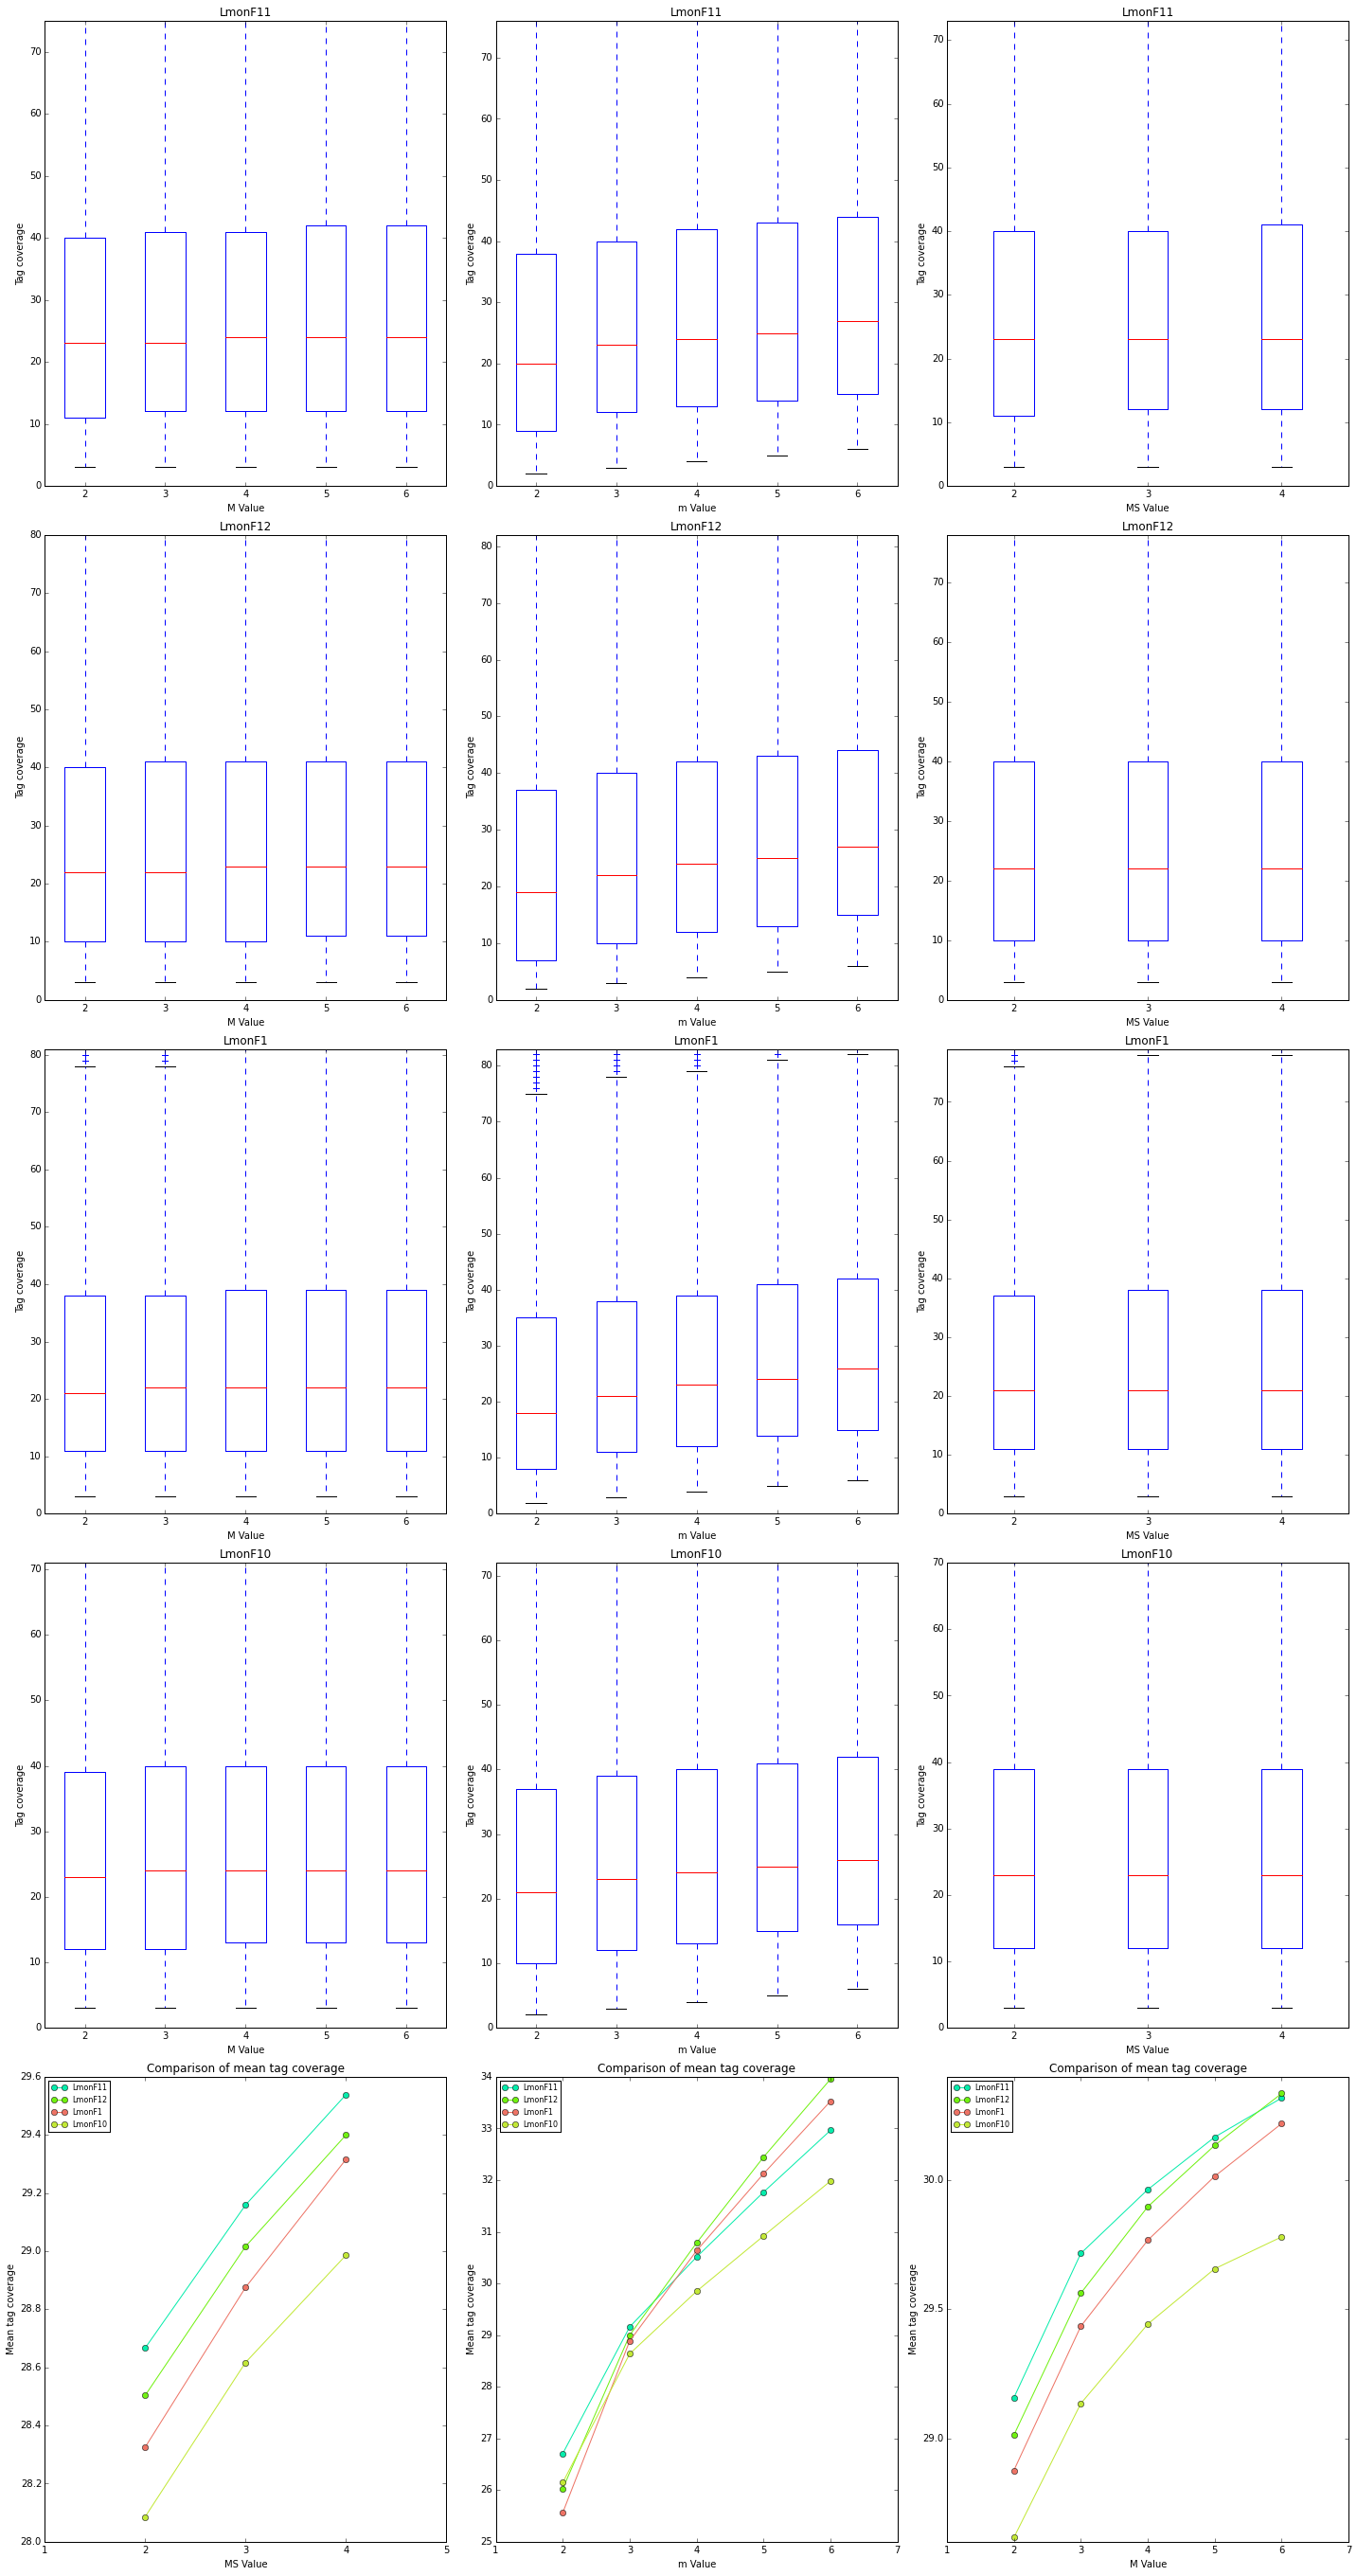

In [12]:
Incremental_U_outputs = IncU.IncreMental_U(Setup_dict)

<b>Final Ustacks commands</b> -------------------------------------------------------------------------------------------------------------------

ustacks -t gzfastq -f SAMPLE.fq.gz -i 1 -m 3 -M 2 -r -d;  



###2. Cstacks tests -------------------------------------------------------------------------------------------------------------------

In [13]:
## INPUT INCREMENTAL_C PARAMETERS HERE -----------------------------------------

## Get IDs for the test samples

Parameter_dict = {}
Parameter_dict["Get_IDs"] = True
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Cstacks/"

IncC.Incremental_C(Parameter_dict)


 ## Sample IDs:

LmonF1, ID = 3
LmonF10, ID = 4
LmonF11, ID = 1
LmonF12, ID = 2


In [16]:
## INPUT INCREMENTAL_C PARAMETERS HERE -----------------------------------------

Parameter_dict = {}
Parameter_dict["Get_IDs"] = False
Parameter_dict["batch_ID"] = 1
Parameter_dict["n_vals"] = [1,2,3,4]
Parameter_dict["threads"] = 7
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Cstacks/"
Parameter_dict["sample_ids"] = [2,3,4]   ## add specific sample ID's of samples you want to look at, if this is not all samples in the directory given above. Leave as empty list if not.
Parameter_dict["run_cline_switch"] = 1     ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

pp = pprint.PrettyPrinter(indent=2)
pp.pprint(Parameter_dict)

{ 'Get_IDs': False,
  'Ustacks_outs_dir': '/home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Cstacks/',
  'batch_ID': 1,
  'n_vals': [1, 2, 3, 4],
  'run_cline_switch': 1,
  'sample_ids': [2, 3, 4],
  'threads': 7}



### ----- Making and running command lines ----- ###

n value = 1
cstacks -b 1 -n 1 -s /home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Cstacks//LmonF10 -s /home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Cstacks//LmonF12 -s /home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Cstacks//LmonF1 7 -o /home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Cstacks//n_1
Running Command line

n value = 2
cstacks -b 1 -n 2 -s /home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Cstacks//LmonF10 -s /home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Cstacks//LmonF12 -s /home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Cstacks//LmonF1 7 -o /home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Cstacks//n_2
Running Command line

n value = 3
cstacks -b 1 -n 3 -s /home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Cstacks//LmonF10 -s /home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Cstacks//LmonF12 -s /home/djeffrie/Data/RADseq/Lmontezumae/Incremental/Cstacks//LmonF1 7 -o /home/djeffrie/Data/RADseq/Lmont

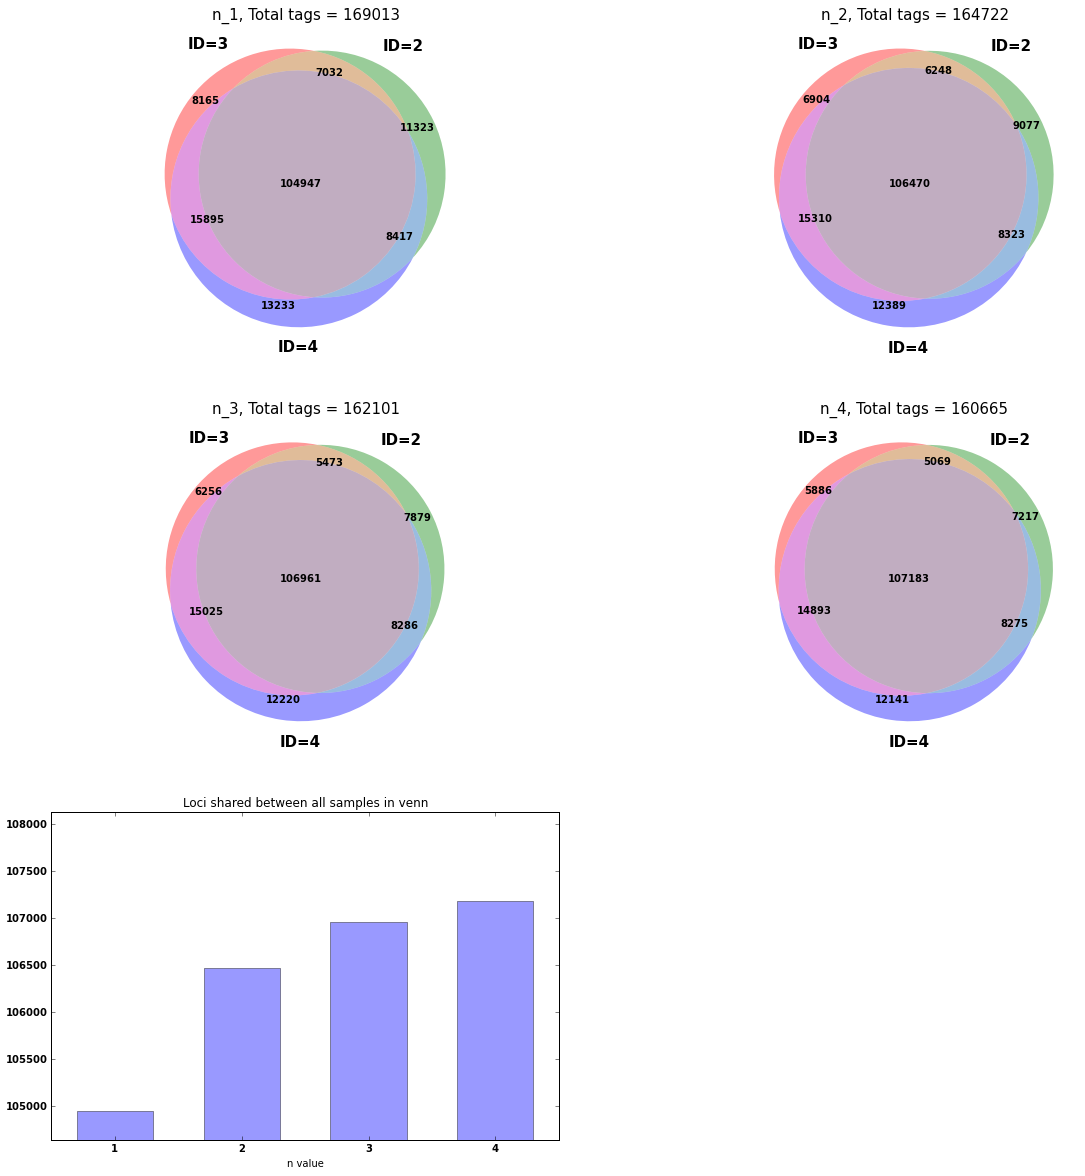

In [17]:
IncC.Incremental_C(Parameter_dict)  

## Note Rche_150 (ID = 6) is not good quality so I expect this sample to share fewer loci than the other two

Indeed Rche_150 has much fewer loci. But in general the sharing is not great between them. However there are a large number of loci so I should still end up with a decent number present in most samples.

<b>Final Cstacks command</b> ----------------------------------------------------------------------------------------------------------------------------

cstacks -b 1 -n2 -p 7  -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonF1 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonF10 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonF11 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonF12 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonF2 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonF3 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonF4 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonF5 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonF6 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonF7 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonF8 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonF9 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonM1 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonM2 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonM3 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonM4 -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/LmonM5 -o /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Lmontezumae/Stacks/


<b> Final Sstacks commands </b> -------------------------------------------------------------------------------------------------------------------------  
sstacks -b1 -c batch_1 -s LmonF10 -p 12
sstacks -b1 -c batch_1 -s LmonF11 -p 12
sstacks -b1 -c batch_1 -s LmonF12 -p 12
sstacks -b1 -c batch_1 -s LmonF1 -p 12
sstacks -b1 -c batch_1 -s LmonF2 -p 12
sstacks -b1 -c batch_1 -s LmonF3 -p 12
sstacks -b1 -c batch_1 -s LmonF4 -p 12
sstacks -b1 -c batch_1 -s LmonF5 -p 12
sstacks -b1 -c batch_1 -s LmonF6 -p 12
sstacks -b1 -c batch_1 -s LmonF7 -p 12
sstacks -b1 -c batch_1 -s LmonF8 -p 12
sstacks -b1 -c batch_1 -s LmonF9 -p 12
sstacks -b1 -c batch_1 -s LmonM1 -p 12
sstacks -b1 -c batch_1 -s LmonM2 -p 12
sstacks -b1 -c batch_1 -s LmonM3 -p 12
sstacks -b1 -c batch_1 -s LmonM4 -p 12
sstacks -b1 -c batch_1 -s LmonM5 -p 12

###3. Populations tests  -----------------------------------------------------------------------------------------------------------------

First, I am using relaxed sample filtering criteria (i.e. the constraints on number of samples a locus must be present in are loose). This will allow me to look at which samples are responsible for a lot of locus dropout. If some samples are particularly bad they can be removed and the dataset will likely be better off.

<b> relaxed populations command </b>

populations -b1 -M popmap.txt -P ./ -r 0.5 -p 1 --vcf -t 12 > Populations_relaxed.log 2>&1 & 

Running populations like this means that a locus has to be present in at least half the samples in at least 1 sex. We will have to be more strict with the final dataset. 

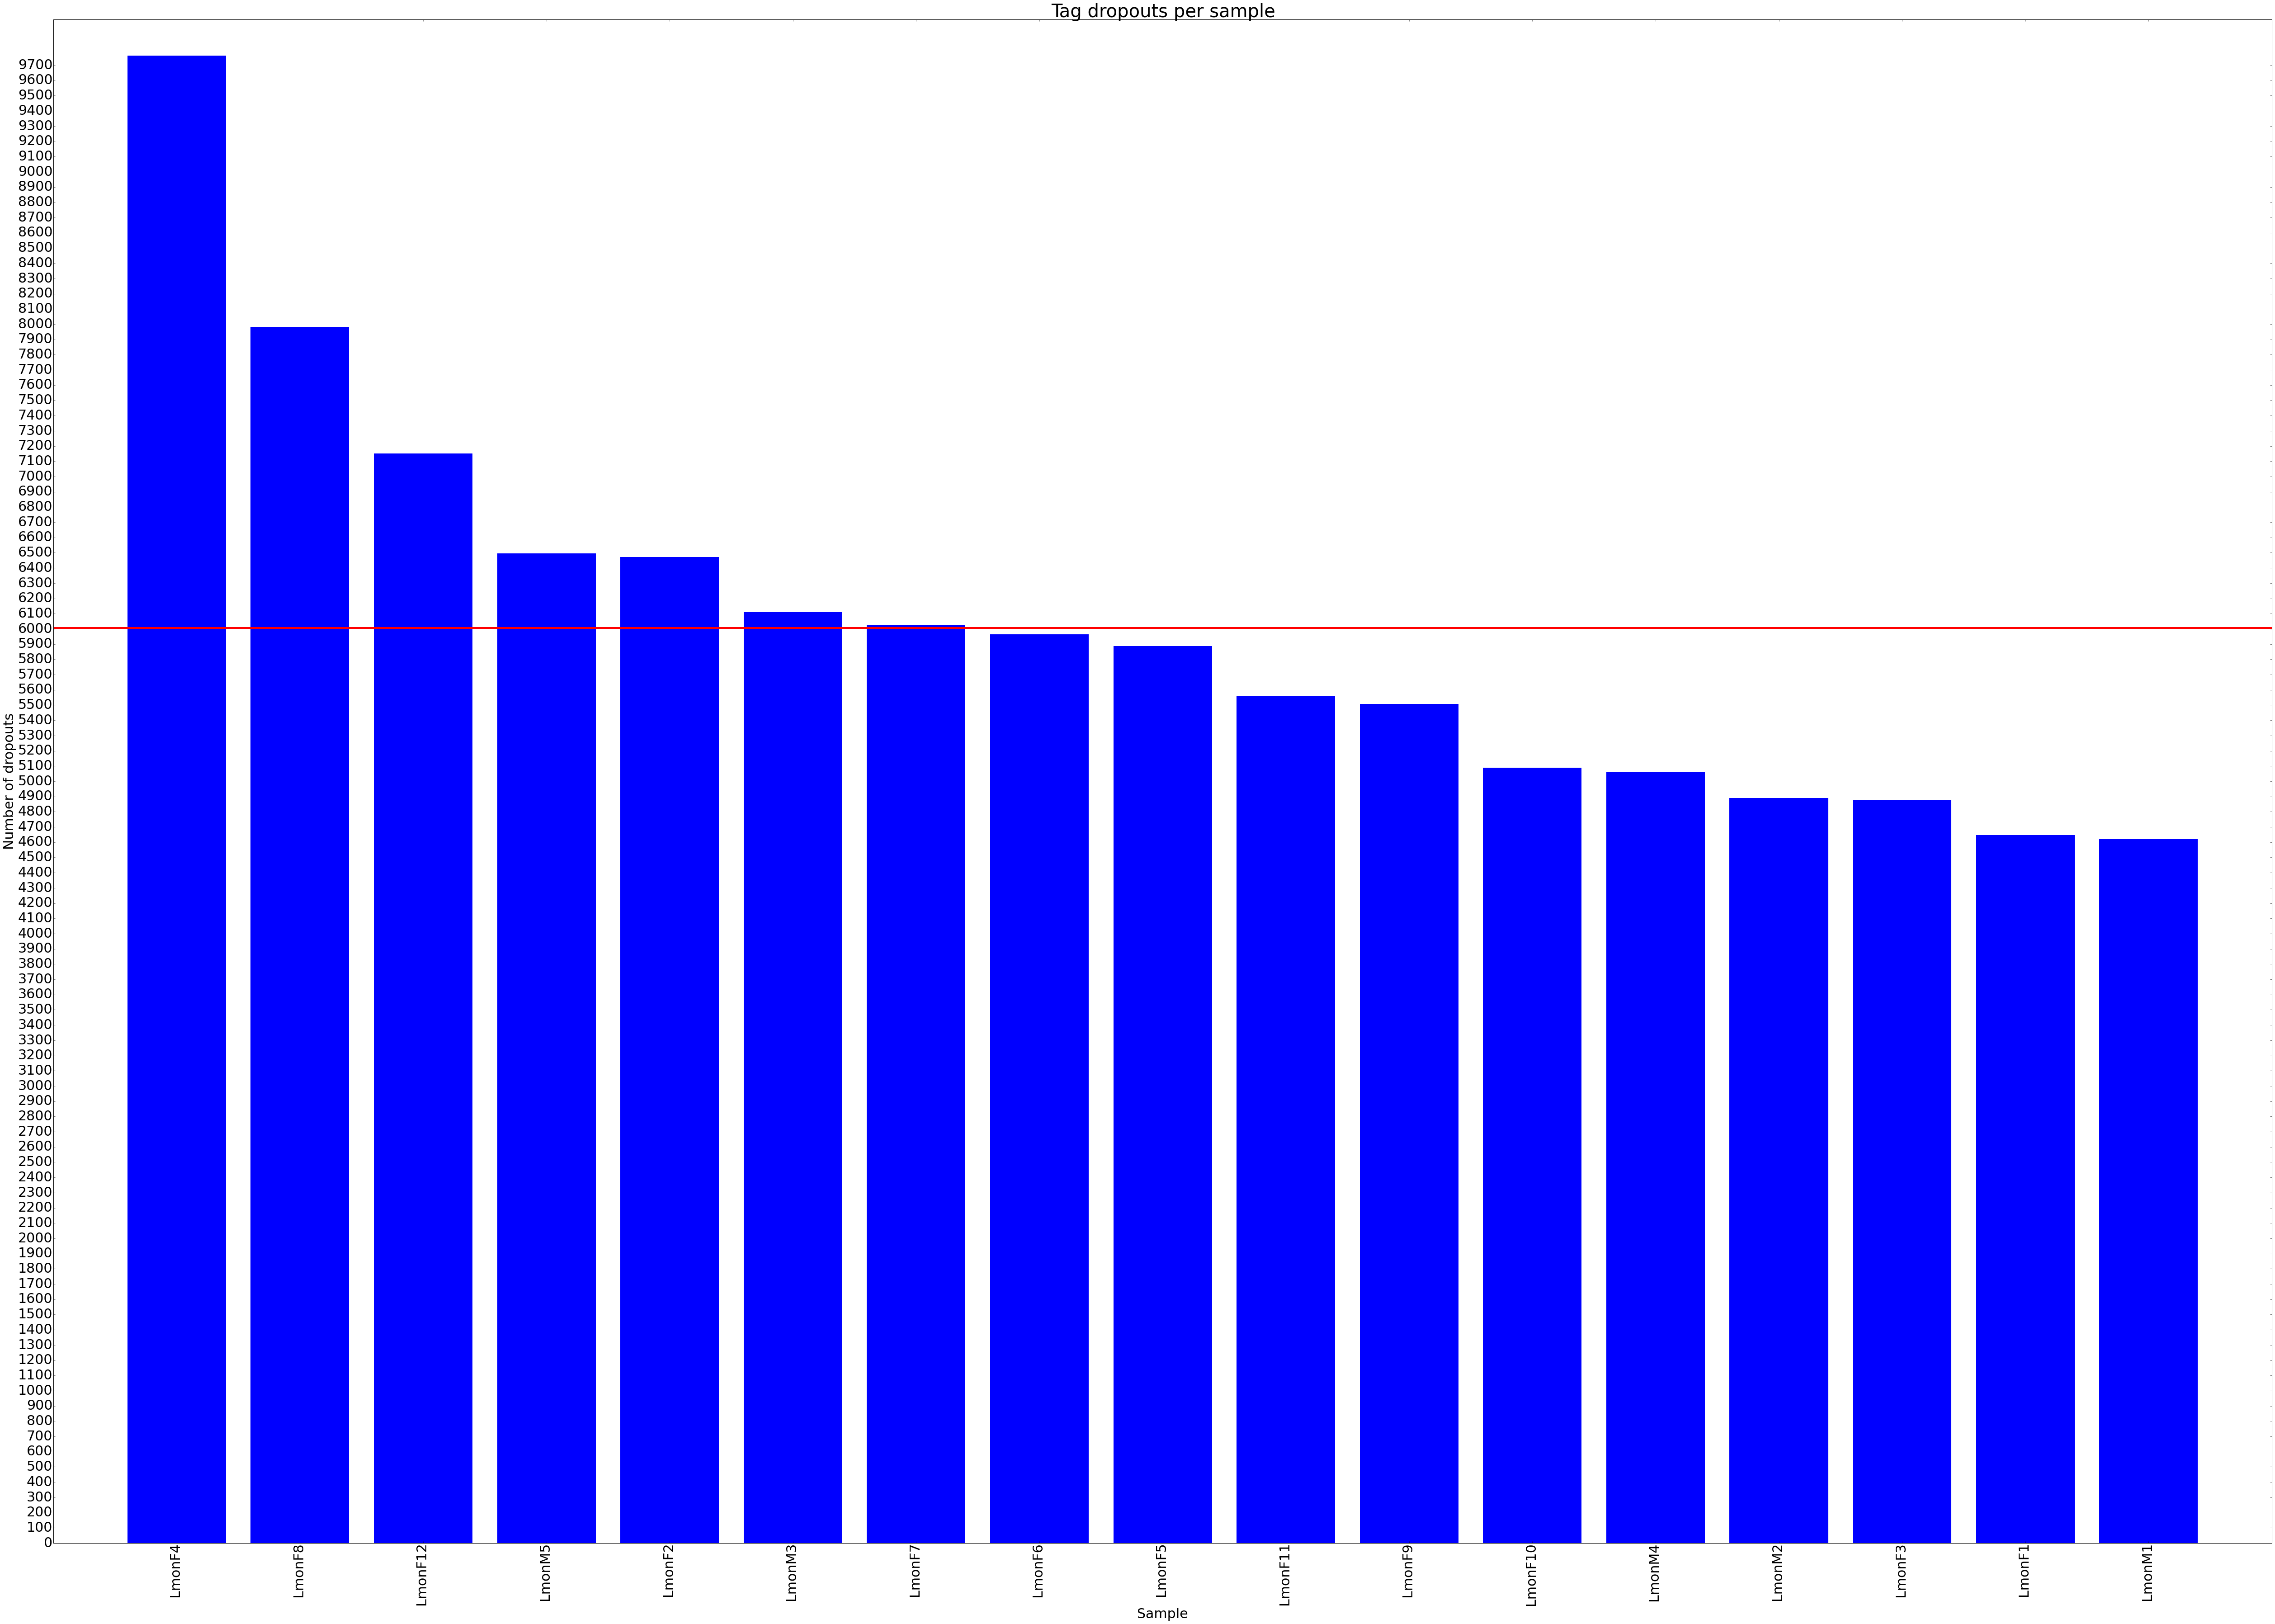

Outputs written to:
/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Populations_relaxed/Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Populations_relaxed/Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Populations_relaxed/Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Populations_relaxed/Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Populations_relaxed/blacklist.txt


In [3]:
wd = "/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Populations_relaxed"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

So there aren't any major outliers here, and given the small number of samples to start with, I think I will just keep all samples in here. 

So now run the populations module using strict parameters

    populations -b1 -P ./ -M popmap.txt -r 0.75 -p 2 --vcf -t 8 > Populations_strict_kept1.log 2>&1 &



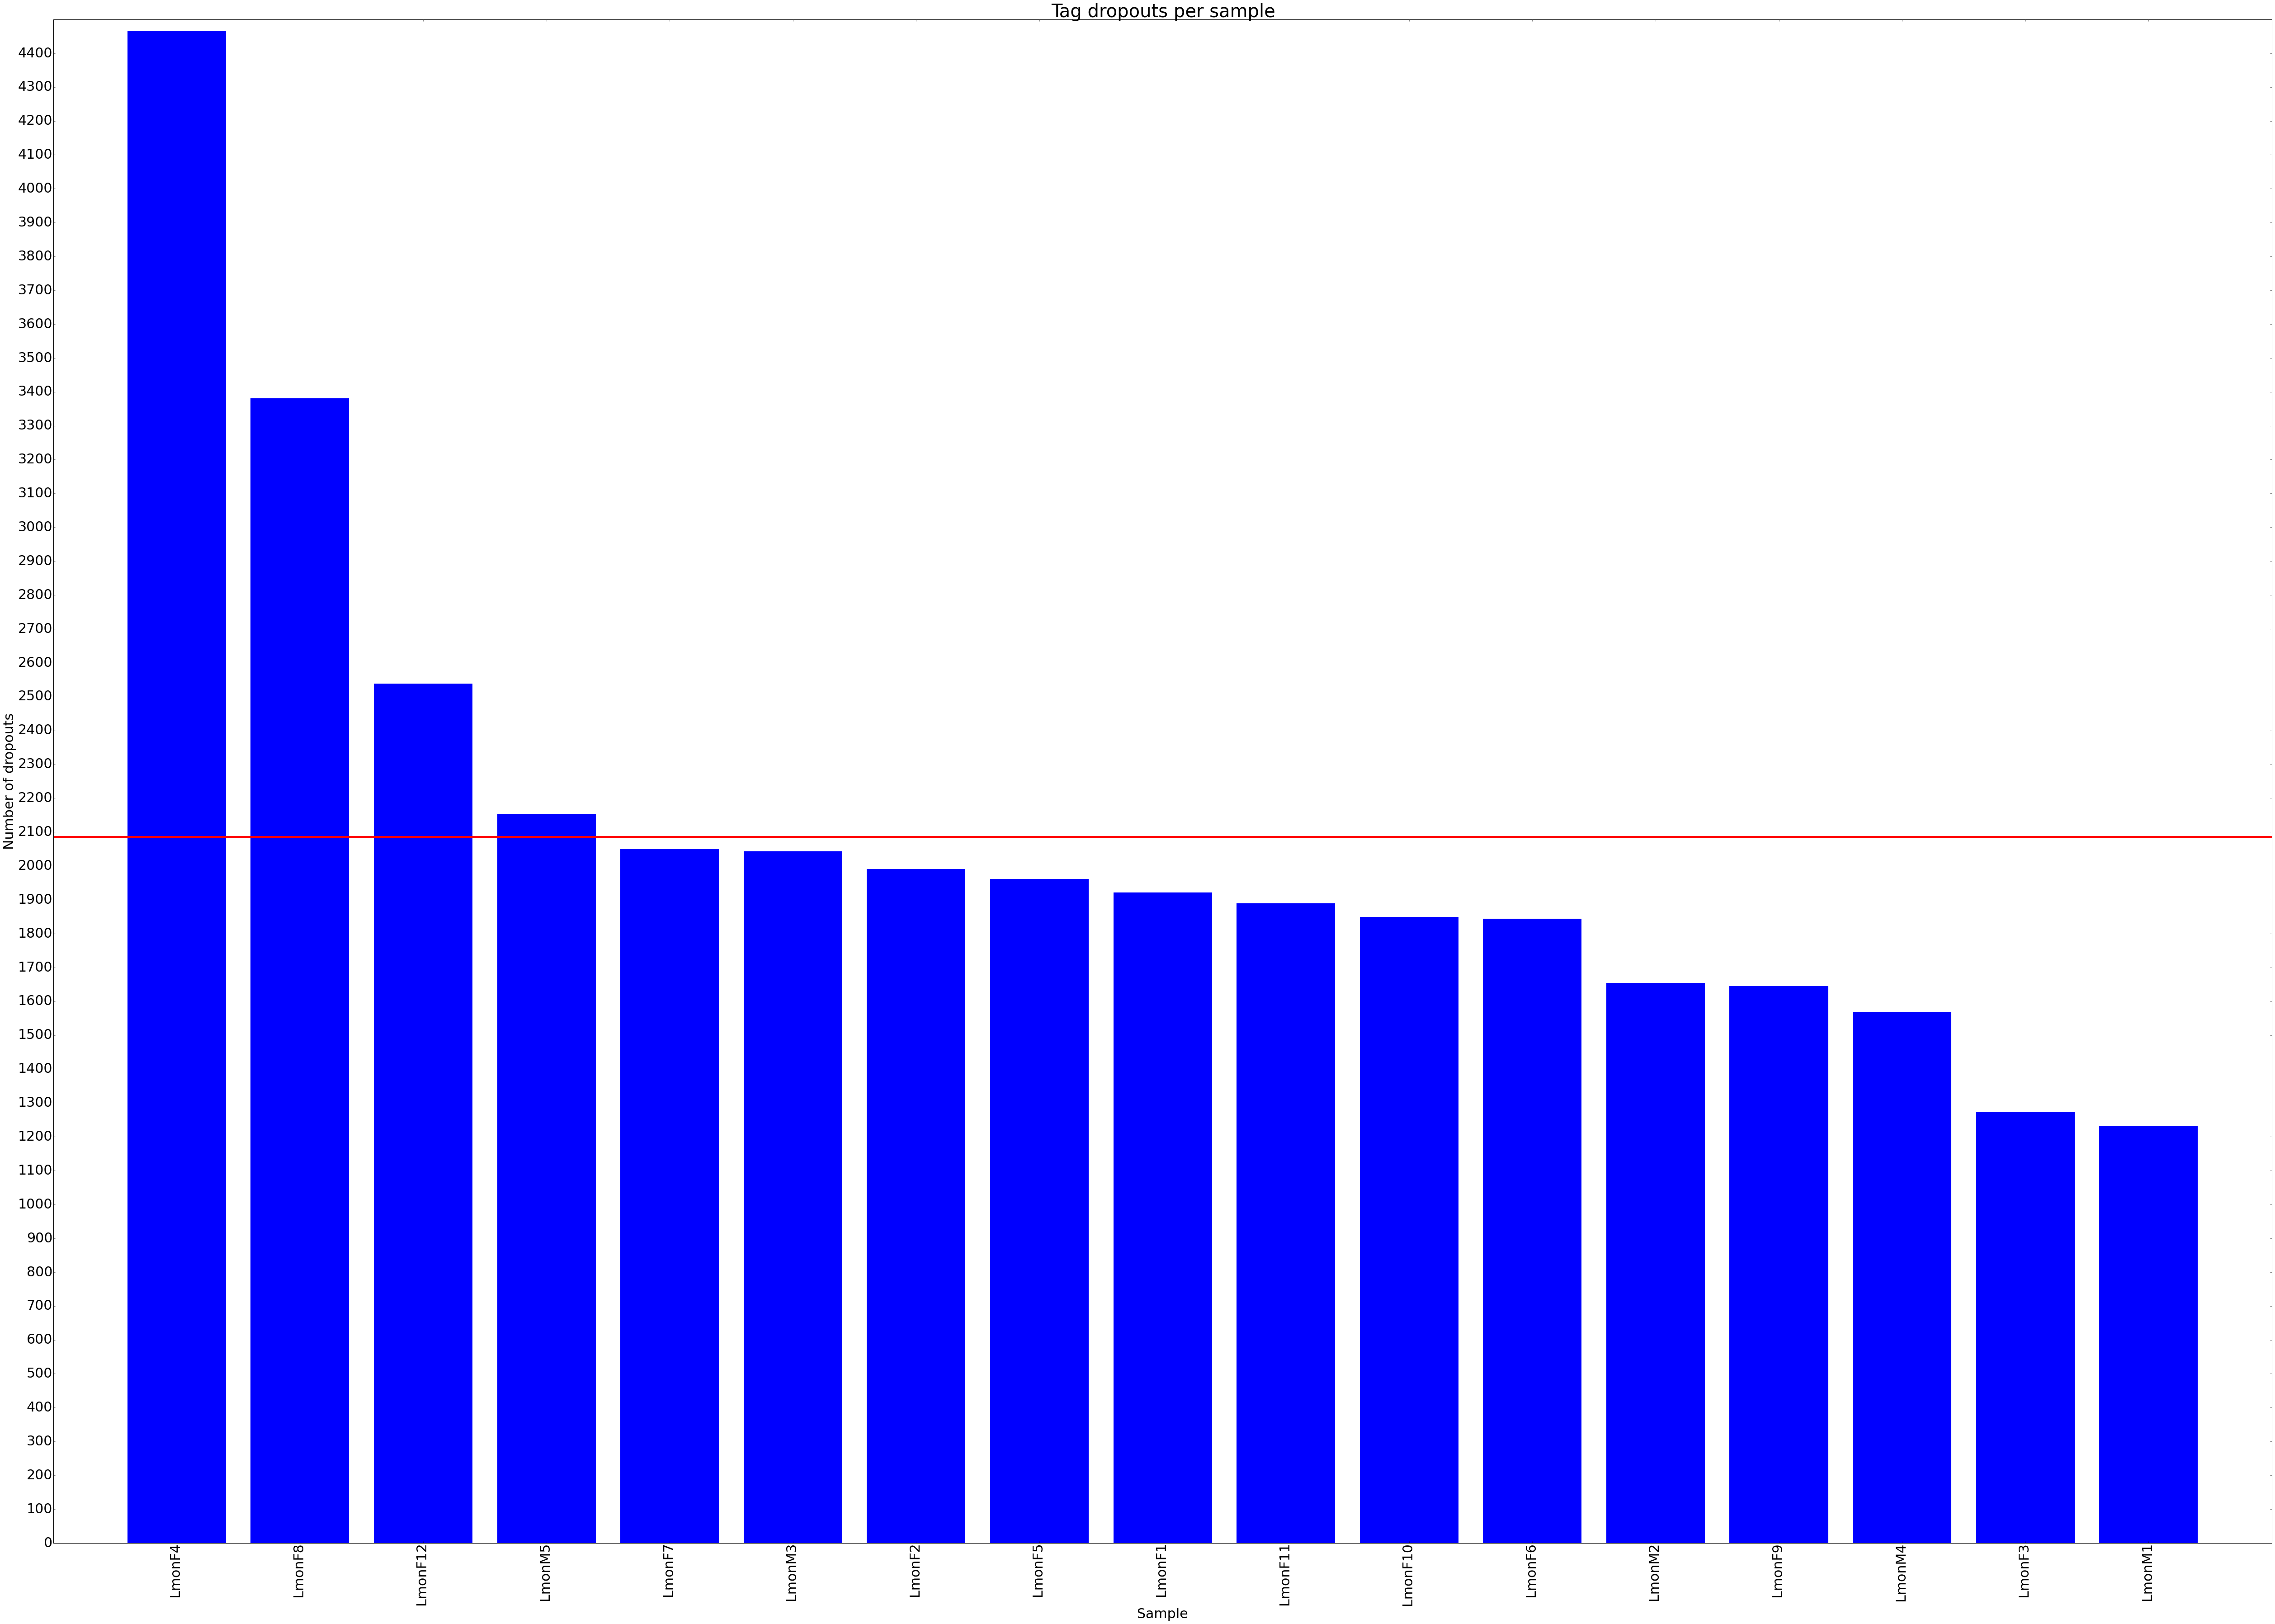

Outputs written to:
/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Populations_strict/Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Populations_strict/Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Populations_strict/Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Populations_strict/Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Populations_strict/blacklist.txt


In [4]:
wd = "/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Populations_strict"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

This retained 33983 samples. And resulted in 39810 SNPs 

### Now run a PCA using all loci to look at the (mostly) neutral structure in the data

In [5]:
%%bash

wd=/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Final_SNP_dataset  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Final_SNP_dataset/batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Final_SNP_dataset/batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Final_SNP_dataset/batch_1_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Final_SNP_dataset/batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Final_SNP_dataset/batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Final_SNP_dataset/batch_1_altered_adegenet_plink-temporary.fam
written.
48325 variants loaded from .bim file.
17 people (0 males, 0 femal

In [8]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Final_SNP_dataset/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("pop_map.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 




 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Saving 19.7 x 19.7 in image

  warnings.warn(x, RRuntimeWarning)


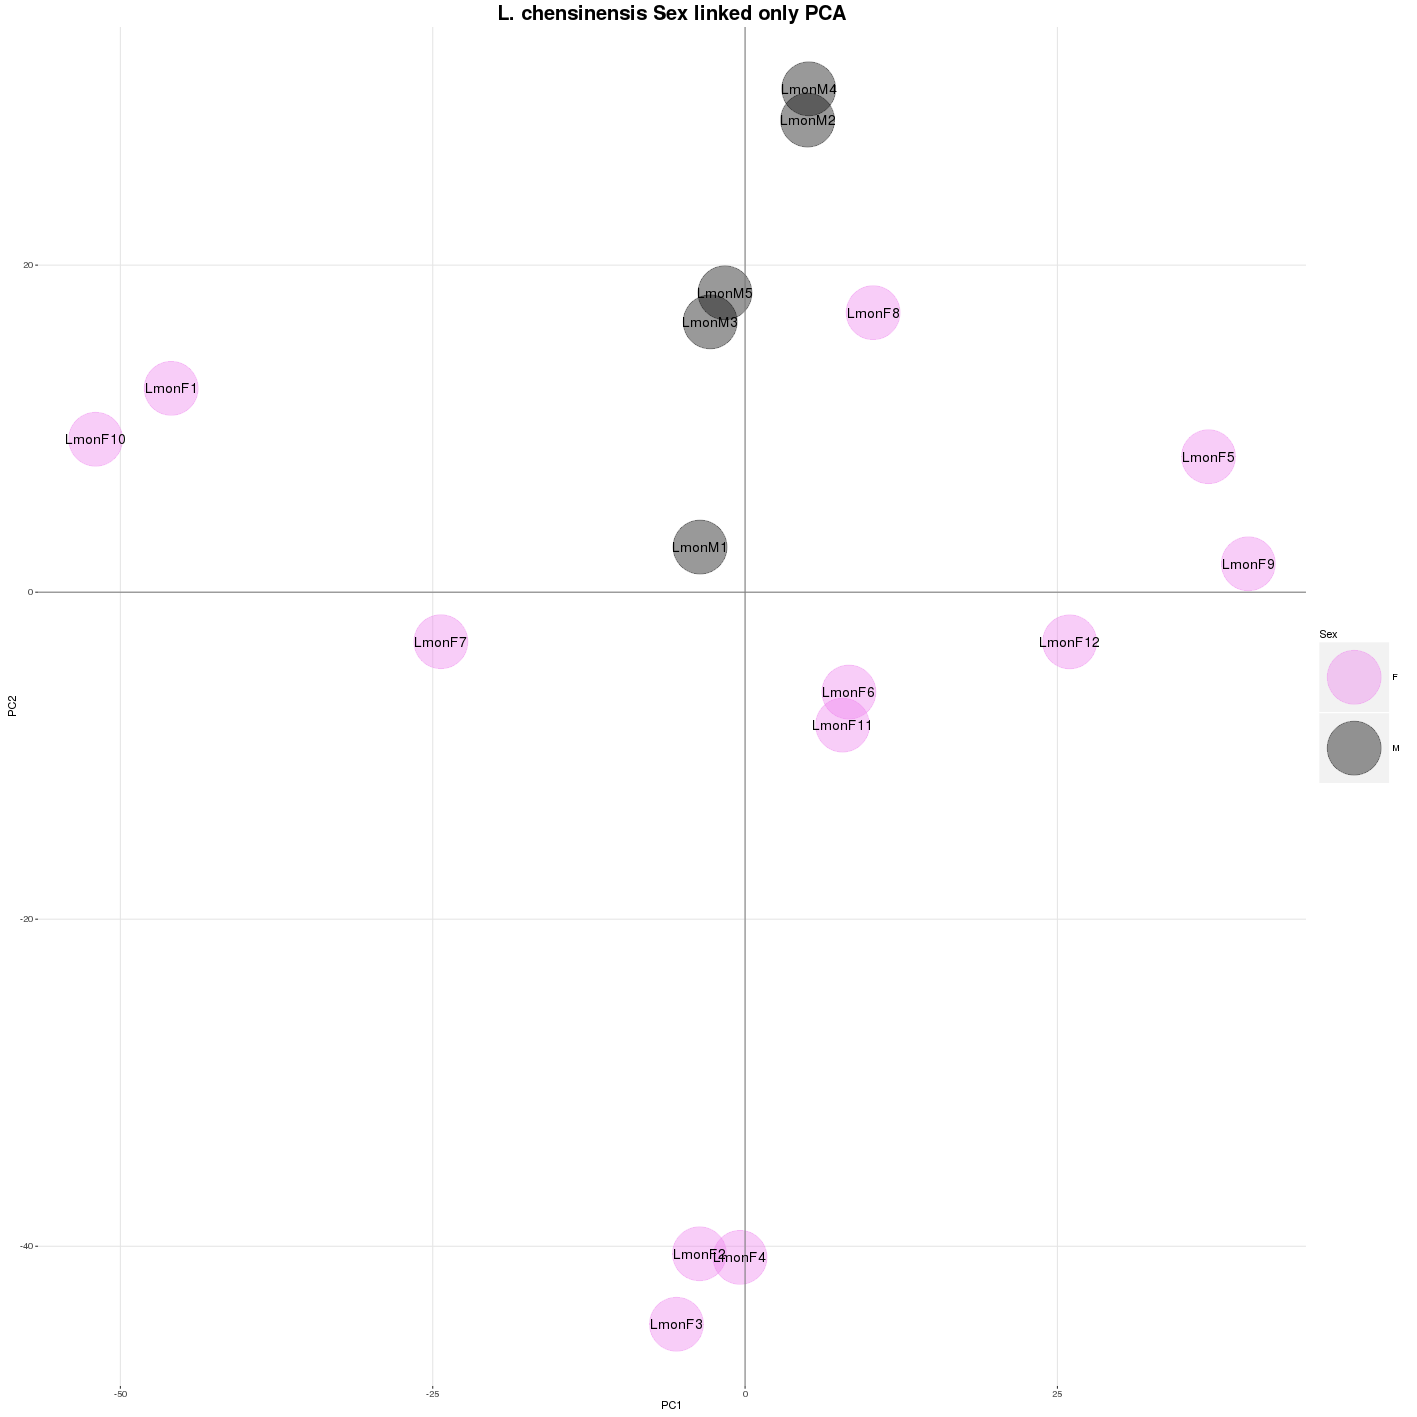

In [9]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L. chensinensis Sex linked only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

So there is a bit of stucture here in the females. Will see if this causes problems. 

### Now find sex linked markers using the 3 approaches in Brelsford & Lavanchy et al (2016)

In [24]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Final_SNP_dataset/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Final_SNP_dataset/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Final_SNP_dataset/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.7 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.6 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 48325
Number of samples = 17
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 48324
Number of putative X linked snps = 137
Number of putative X linked tags = 112
Number of putative Z linked markers = 316
Number of putative Z linked tags = 263


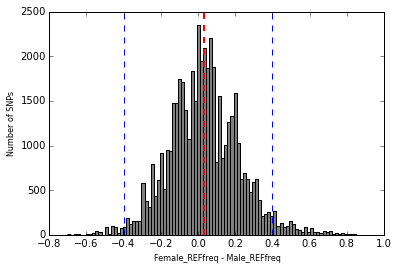


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 48325
Number of samples = 17
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 48324
Number of putative X linked snps = 115
Number of putative X linked tags = 100
Number of putative Z linked markers = 71
Number of putative Z linked tags = 62

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 12
Number of males: 5
Number of Putative Y linked tags: 41
Number of Putative W linked tags: 73

 ### DONE! ###


 ## After merging tags accross methods ## 

Final number of XY tags = 204
Final number of ZW tags = 375
Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Lmontezumae/Stacks/Final_SNP_dataset


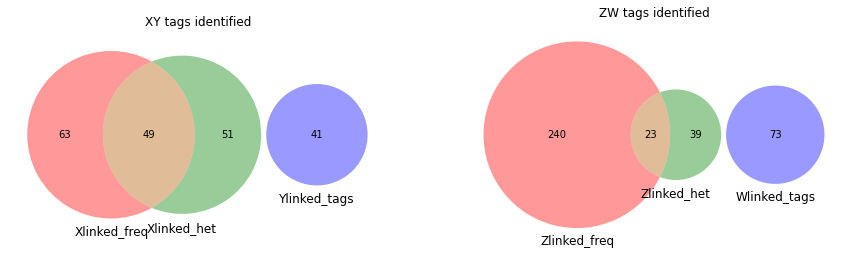

In [25]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

## Summary

Short story here is there are not enough males. This leads to far too many false positives. I don't think it is worth going any further with this dataset for now. 
